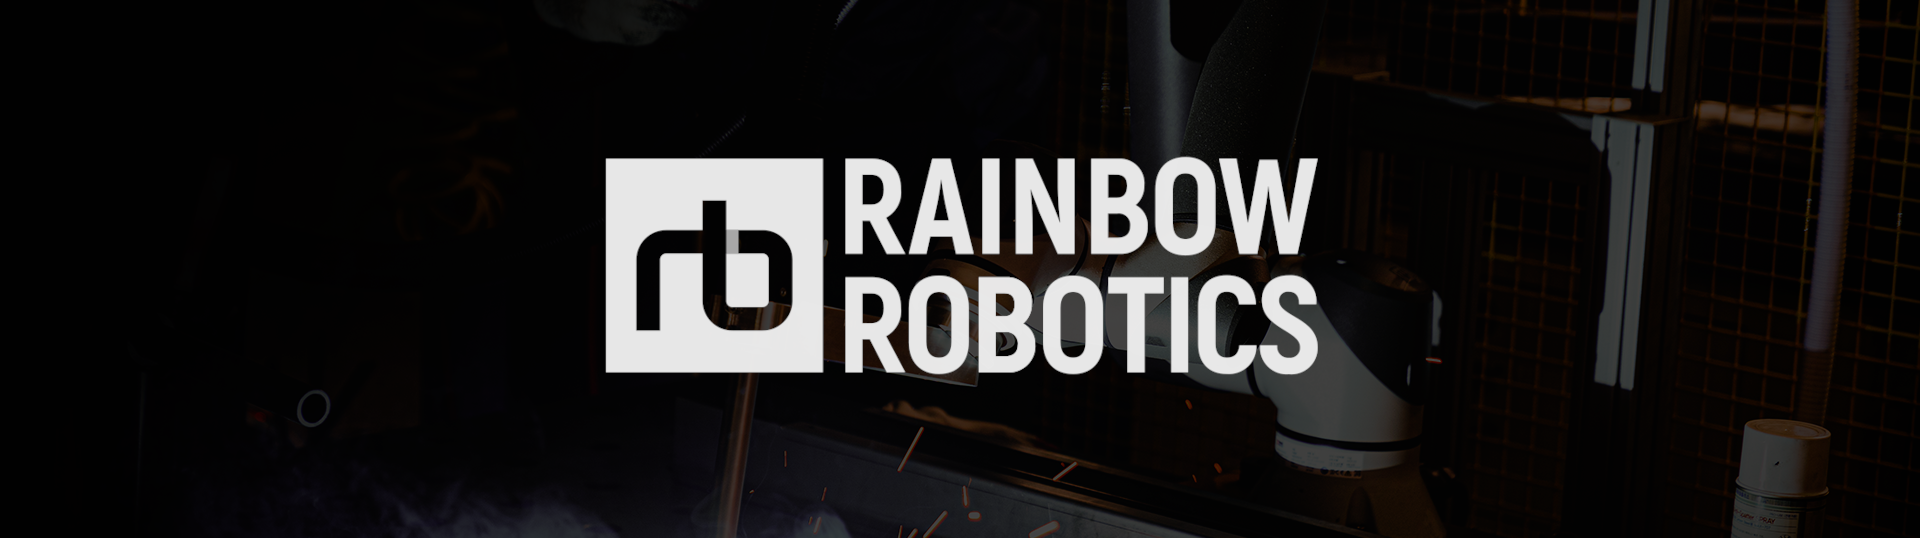

In [1]:
! pip install matplotlib

### (Optional) Run RBY1 Simulator on Docker

[Official Guide](https://rainbowrobotics.github.io/rby1-dev/docs/simulators/)

#### 1. Prerequisites

- **Docker Installed**
    - Refer to [Docker’s official documentation](https://docs.docker.com/get-docker/) for your operating system (Linux, macOS, or Windows).
    - Currently, we tested on Linux and Windows (WSL).


#### 2. Pull the Simulator Image

Pull the latest Docker image from the **rainbowroboticsofficial** repository:
```bash
$ docker pull rainbowroboticsofficial/rby1-sim:latest
```
  - You can check the documentation or Docker Hub for a specific version tag if needed (e.g., :X.X.X).

#### 3. Running the Simulation

```bash
$ xhost +local:docker
$ docker run -it --rm \
  --name rby1-sim \
  --net=host \
  -e DISPLAY=$DISPLAY \
  -v /tmp/.X11-unix:/tmp/.X11-unix:rw \
  rainbowroboticsofficial/rby1-sim:latest
```

In [2]:
import rby1_sdk as rby

In [3]:
import time
import numpy as np
from matplotlib import pyplot as plt

np.set_printoptions(suppress=True, precision=3, linewidth=300)

In [4]:
ROBOT_ADDRESS = "10.211.55.4:50051"

In [5]:
# Robot Model is "A"
robot = rby.create_robot_a(ROBOT_ADDRESS)
model = robot.model()
if not robot.connect():
    print("Could not connect to robot")
    exit(1)

In [6]:
 # Turn on all the power (5v, 12v, 24v, 48v)
robot.power_on(".*")

True

In [7]:
# Enable servo motors on all actuators
robot.servo_on(".*")

True

In [8]:
# Reset the fault control manager
robot.reset_fault_control_manager()

# Enable control manager with limited mode disabled
robot.enable_control_manager(unlimited_mode_enabled=True)

True

# Example 1: Move to Zero Position

This example demonstrates a basic motion operation for the robot.
When sending motion commands to the robot, the **Builder pattern** is used to construct the commands.
The robot is divided into three main components: **mobility**, **body**, and **head**.
For the body, commands can be issued to the entire body or individually to the **torso**, **right arm**, and **left arm**.

This example provides a fundamental understanding of how to control the robot and move it to the zero position.

In [9]:
# Move to Zero position
minimum_time = 5
rc_builder = rby.RobotCommandBuilder().set_command(
    rby.ComponentBasedCommandBuilder().set_body_command(
        rby.BodyComponentBasedCommandBuilder()
        # Set Torso Command with Joint Position Command
        .set_torso_command(
            rby.JointPositionCommandBuilder()
            .set_minimum_time(minimum_time)
            .set_position([0.] * 6)
        )
        # Set Right Command with Joint Position Command
        .set_right_arm_command(
            rby.JointPositionCommandBuilder()
            .set_minimum_time(minimum_time)
            .set_position([0.] * 7)
        )
        # Set Left Command with Joint Position Command
        .set_left_arm_command(
            rby.JointPositionCommandBuilder()
            .set_minimum_time(minimum_time)
            .set_position([0.] * 7)
        )
    )
)
handler = robot.send_command(rc_builder)
feedback = handler.get()  # Wait for finish and get feedback from control
print(feedback.finish_code)

FinishCode.Ok


# Example 2: Get Robot State

In [10]:
robot_state = robot.get_state()

In [11]:
print("# Position")
print(
    f"Torso: {robot_state.position[model.torso_idx]}, Right Arm: {robot_state.position[model.right_arm_idx]}, Left Arm: {robot_state.position[model.left_arm_idx]}")
print("# Current")
print(
    f"Torso: {robot_state.current[model.torso_idx]}, Right Arm: {robot_state.current[model.right_arm_idx]}, Left Arm: {robot_state.current[model.left_arm_idx]}")

# Position
Torso: [0. 0. 0. 0. 0. 0.], Right Arm: [-0. -0.  0. -0.  0. -0. -0.], Left Arm: [-0. -0. -0. -0. -0. -0. -0.]
# Current
Torso: [-5.937  2.577  3.908  5.028 -1.986 -0.007], Right Arm: [-0.197 -0.417 -0.001  1.311 -0.001 -0.053  0.   ], Left Arm: [-0.174  0.35   0.001  1.242  0.001 -0.03   0.   ]


In [12]:
import inspect

robot_state_properties = [name for name, obj in
                          inspect.getmembers(type(robot_state), lambda x: isinstance(x, property))]
print(f"You can get the various states from robot: {robot_state_properties}")

You can get the various states from robot: ['battery_state', 'center_of_mass', 'collisions', 'current', 'emo_states', 'ft_sensor_left', 'ft_sensor_right', 'is_ready', 'joint_states', 'odometry', 'position', 'power_states', 'system_stat', 'target_feedback_gain', 'target_feedforward_torque', 'target_position', 'target_velocity', 'timestamp', 'tool_flange_left', 'tool_flange_right', 'torque', 'velocity']


# Example 3: Get Robot State Stream

In [13]:
def ex3_cb_robot_state(robot_state, control_manager_state):
    with np.printoptions(suppress=True, precision=3, linewidth=300):
        print(robot_state.position)

In [14]:
robot.start_state_update(ex3_cb_robot_state, 10)

time.sleep(2)

robot.stop_state_update()

[ 0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.]
[ 0.  0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.]
[ 0.  0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.]
[ 0.  0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.]
[ 0.  0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.]
[ 0.  0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.]
[ 0.  0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.]
[ 0.  0.  0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.]
[ 0.  0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.]
[ 0.  0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.]
[ 0.001  0.001  0.  

# Example 4: Parameters

In [15]:
parameter_list = robot.get_parameter_list()
ptype_name = {0: 'int', 1: 'float', 2: 'str', 3: 'list[float] (length: 3)', 4: 'list[float] (length: 6)',
              5: 'list[float] (length: 7)'}
print("# Parameters")
for [pname, ptype] in parameter_list:
    print(f"{pname}: {ptype_name[ptype]}")

# Parameters
se2_velocity_command.canceling_time: float
joint_velocity_command.canceling_time: float
cartesian_command.canceling_time: float
joint_position_command.cutoff_frequency: float
stop_command.canceling_time: float
joint_position_command.canceling_time: float
jog_command.canceling_time: float
default.se2_velocity_command.acceleration_limit: list[float] (length: 3)
default.optimal_control_command.stop_cost: float
robot_model_name: str
model_name: str
battery_config: list[float] (length: 7)
cartesian_command.cutoff_frequency: float
power_command.timeout: float
servo_on_command.new_data_timeout: float
servo_on_command.timeout: float
gravity: list[float] (length: 3)
default.acceleration_limit_scaling: float
default.velocity_limit_scaling: float
default.angular_acceleration_limit: float
soft_stop_enabled: int
default.linear_acceleration_limit: float
jog_command.one_step_size: float
default.optimal_control_command.velocity_tracking_gain: float


In [16]:
recording = False
record = []


def ex4_cb_robot_state(robot_state: rby.RobotState_A):
    global recording, record
    if recording:
        record.append(robot_state.target_position)


robot.start_state_update(ex4_cb_robot_state, 50)

In [17]:
def ex4_move_to(torso, right_arm, left_arm, minimum_time=2.0):
    rc_builder = rby.RobotCommandBuilder().set_command(
        rby.ComponentBasedCommandBuilder().set_body_command(
            rby.BodyComponentBasedCommandBuilder()
            # Set Torso Command with Joint Position Command
            .set_torso_command(
                rby.JointPositionCommandBuilder()
                .set_command_header(rby.CommandHeaderBuilder().set_control_hold_time(0.5))  # For staturation
                .set_minimum_time(minimum_time)
                .set_position(torso)
            )
            # Set Right Command with Joint Position Command
            .set_right_arm_command(
                rby.JointPositionCommandBuilder()
                .set_command_header(rby.CommandHeaderBuilder().set_control_hold_time(0.5))
                .set_minimum_time(minimum_time)
                .set_position(right_arm)
            )
            # Set Left Command with Joint Position Command
            .set_left_arm_command(
                rby.JointPositionCommandBuilder()
                .set_command_header(rby.CommandHeaderBuilder().set_control_hold_time(0.5))
                .set_minimum_time(minimum_time)
                .set_position(left_arm)
            )
        )
    )
    rc = robot.send_command(rc_builder).get()
    return rc.finish_code == rby.RobotCommandFeedback.FinishCode.Ok


def ex4_cutoff_frequency(cutoff_frequency):
    global recording, record

    robot.set_parameter("joint_position_command.cutoff_frequency", f"{cutoff_frequency}")

    recording = True
    record = []
    ex4_move_to([0] * 6, [0] * 7, [0] * 7)
    ex4_move_to(np.deg2rad([0.0, 45.0, -90.0, 45.0, 0.0, 0.0]), np.deg2rad([0.0, -5.0, 0.0, -120.0, 0.0, 70.0, 0.0]),
                np.deg2rad([0.0, 5.0, 0.0, -120.0, 0.0, 70.0, 0.0]))
    recording = False

    return record.copy()


ex4_move_to(np.deg2rad([0.0, 45.0, -90.0, 45.0, 0.0, 0.0]), np.deg2rad([0.0, -5.0, 0.0, -120.0, 0.0, 70.0, 0.0]),
            np.deg2rad([0.0, 5.0, 0.0, -120.0, 0.0, 70.0, 0.0]))

recorded_data = {
    1: np.vstack(ex4_cutoff_frequency(1)),
    50: np.vstack(ex4_cutoff_frequency(50)),
}

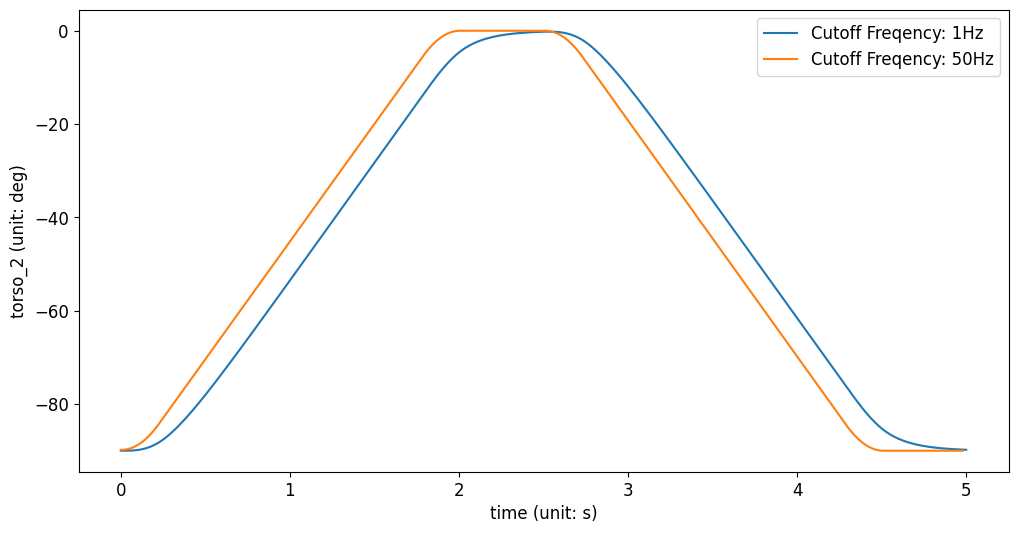

In [18]:
plt.figure(figsize=(12, 6), facecolor='white', dpi=100)
plt.rcParams.update({'font.size': 12})

plt.plot(np.arange(0, recorded_data[1].shape[0]) * 0.02, np.rad2deg(recorded_data[1][:, 4]),
         np.arange(0, recorded_data[50].shape[0]) * 0.02, np.rad2deg(recorded_data[50][:, 4]))
plt.xlabel('time (unit: s)')
plt.ylabel('torso_2 (unit: deg)')
plt.legend(['Cutoff Freqency: 1Hz', 'Cutoff Freqency: 50Hz'])

In [19]:
robot.stop_state_update()

# Example 5: Minimum Time

In [20]:
class Recoder:
    """ContextManager to record target_position and position(encoder)"""

    def __init__(self, robot, record_freq=10):
        self.robot = robot
        self.record_freq = record_freq
        self.target_position = []
        self.position = []
        self.velocity = []
        self.timestamp = []

    def __enter__(self):
        self.target_position = []
        self.position = []
        self.velocity = []
        self.timestamp = []

        self.robot.stop_state_update()
        self.robot.start_state_update(self.cb, rate=self.record_freq)

    def __exit__(self, type, value, traceback):
        self.robot.stop_state_update()

    def cb(self, robot_state, control_manager_state):
        self.target_position.append(robot_state.target_position)
        self.position.append(robot_state.position)
        self.velocity.append(robot_state.velocity)

    def add_timestamp(self):
        self.timestamp.append(len(self.position))

In [21]:
def ex5_move_right_arm(position, velocity_limit=None, acceleration_limit=None, minimum_time=2.0):
    robot.set_parameter("joint_position_command.cutoff_frequency", "5.0")
    jpc_builder = (
        rby.JointPositionCommandBuilder()
        .set_minimum_time(minimum_time)
        .set_position(position)
    )
    if velocity_limit is not None:
        jpc_builder.set_velocity_limit(velocity_limit)
    if acceleration_limit is not None:
        jpc_builder.set_acceleration_limit(acceleration_limit)

    rc_builder = rby.RobotCommandBuilder().set_command(
        rby.ComponentBasedCommandBuilder().set_body_command(
            rby.BodyComponentBasedCommandBuilder()
            # Set Right Command with Joint Position Command
            .set_right_arm_command(jpc_builder)
        )
    )
    rc = robot.send_command(rc_builder).get()
    return rc.finish_code == rby.RobotCommandFeedback.FinishCode.Ok

In [22]:
recorder = Recoder(robot, 50)
minimum_times = [0.5, 1, 3, 5]

data = {}
for minimum_time in minimum_times:
    ex5_move_right_arm([0.] * 7, minimum_time=1.)
    time.sleep(1.0)

    with recorder:
        ex5_move_right_arm(np.deg2rad([0.0, -5.0, 0.0, -120.0, 0.0, 70.0, 0.0]), np.deg2rad([90] * 7),
                           np.deg2rad([90] * 7), minimum_time)
    data[minimum_time] = (
        np.vstack(recorder.target_position),
        np.vstack(recorder.position),
        np.vstack(recorder.velocity)
    )

Text(0.02, 0.5, 'right_arm_3 (unit: deg)')

<Figure size 1200x600 with 0 Axes>

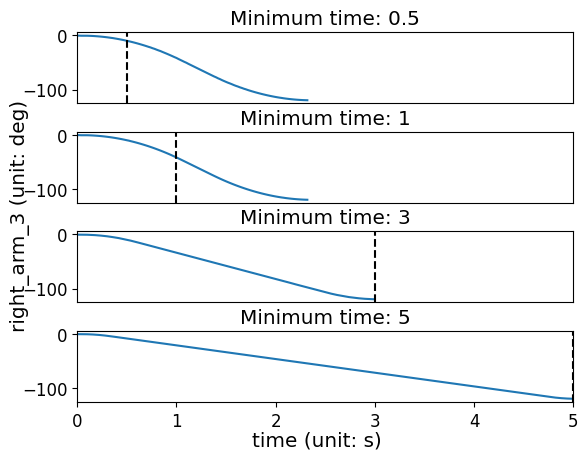

In [23]:
plt.figure(figsize=(12, 6), facecolor='white', dpi=100)
plt.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(4, 1)

for i, minimum_time in enumerate(minimum_times):
    ax[i].set_title(f'Minimum time: {minimum_time}')
    ax[i].plot(np.arange(0, data[minimum_time][0].shape[0]) * 0.02,
               np.rad2deg(data[minimum_time][0][:, model.right_arm_idx[3]]))
    ax[i].axvline(x=minimum_time, color='k', linestyle='--')
    ax[i].set_xlim([0, max(minimum_times)])
    if i != len(minimum_times) - 1:
        ax[i].get_xaxis().set_visible(False)

plt.subplots_adjust(hspace=0.4)
fig.supxlabel('time (unit: s)')
fig.supylabel('right_arm_3 (unit: deg)')

# Example 6: Create Command Stream

In [24]:
def ex6_7_move_right_arm_builder(position, velocity_limit=None, acceleration_limit=None, minimum_time=2.0):
    jpc_builder = (
        rby.JointPositionCommandBuilder()
        .set_command_header(rby.CommandHeaderBuilder().set_control_hold_time(10))
        .set_minimum_time(minimum_time)
        .set_position(position)
    )
    if velocity_limit is not None:
        jpc_builder.set_velocity_limit(velocity_limit)
    if acceleration_limit is not None:
        jpc_builder.set_acceleration_limit(acceleration_limit)

    rc_builder = rby.RobotCommandBuilder().set_command(
        rby.ComponentBasedCommandBuilder().set_body_command(
            rby.BodyComponentBasedCommandBuilder()
            # Set Right Command with Joint Position Command
            .set_right_arm_command(jpc_builder)
        )
    )
    return rc_builder

In [25]:
ex4_move_to(np.deg2rad([0.0, 45.0, -90.0, 45.0, 0.0, 0.0]), np.deg2rad([0.0, -5.0, 0.0, -120.0, 0.0, 70.0, 0.0]),
            np.deg2rad([0.0, 5.0, 0.0, -120.0, 0.0, 70.0, 0.0]))

True

In [26]:
stream = robot.create_command_stream()

recorder = Recoder(robot, 50)
with recorder:
    for i in range(4):
        recorder.add_timestamp()
        stream.send_command(
            ex6_7_move_right_arm_builder(
                [0.] * 7 if i % 2 == 0 else np.deg2rad([0.0, -5.0, 0.0, -120.0, 0.0, 70.0, 0.0]),
                np.deg2rad([90] * 7),
                np.deg2rad([90] * 7), minimum_time=3)
        )
        time.sleep(2.0)
stream.cancel()
stream.wait()

Text(0, 0.5, 'right_arm_3 (unit: deg)')

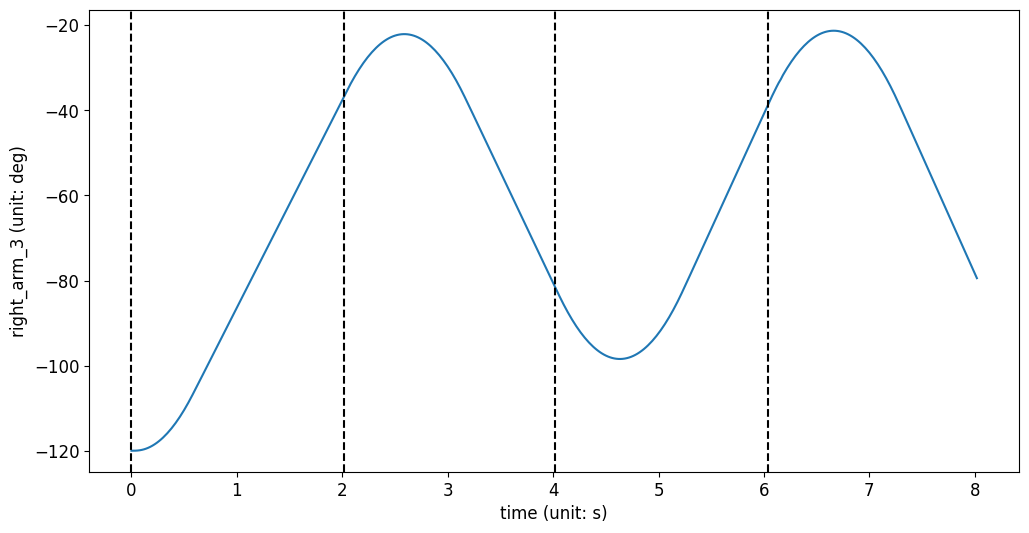

In [27]:
plt.figure(figsize=(12, 6), facecolor='white', dpi=100)
plt.rcParams.update({'font.size': 12})

tp = np.vstack(recorder.target_position)
plt.plot(np.arange(0, tp.shape[0]) * 0.02, np.rad2deg(tp[:, model.right_arm_idx[3]]))
for ts in recorder.timestamp:
    plt.axvline(x=ts * 0.02, color='k', linestyle='--')
plt.xlabel('time (unit: s)')
plt.ylabel('right_arm_3 (unit: deg)')

# Example 7: Create Command Stream w/ Feedback

In [28]:
robot.wait_for_control_ready(100)
ex4_move_to(np.deg2rad([0.0, 45.0, -90.0, 45.0, 0.0, 0.0]), np.deg2rad([0.0, -5.0, 0.0, -120.0, 0.0, 70.0, 0.0]),
            np.deg2rad([0.0, 5.0, 0.0, -120.0, 0.0, 70.0, 0.0]))

True

In [29]:
stream = robot.create_command_stream()

recorder = Recoder(robot, 50)
with recorder:
    for i in range(4):
        recorder.add_timestamp()
        stream.send_command(
            ex6_7_move_right_arm_builder(
                [0.] * 7 if i % 2 == 0 else np.deg2rad([0.0, -5.0, 0.0, -120.0, 0.0, 70.0, 0.0]),
                np.deg2rad([90] * 7),
                np.deg2rad([90] * 7), minimum_time=3)
        )

        start_time = time.monotonic()
        while True:
            feedback = stream.request_feedback()
            if feedback.component_based_command.body_command.body_component_based_command.right_arm_command.joint_position_command.position_based_progress >= 0.7:
                break
            time.sleep(0.1)
robot.cancel_control()
stream.wait()

Text(0, 0.5, 'right_arm_3 (unit: deg)')

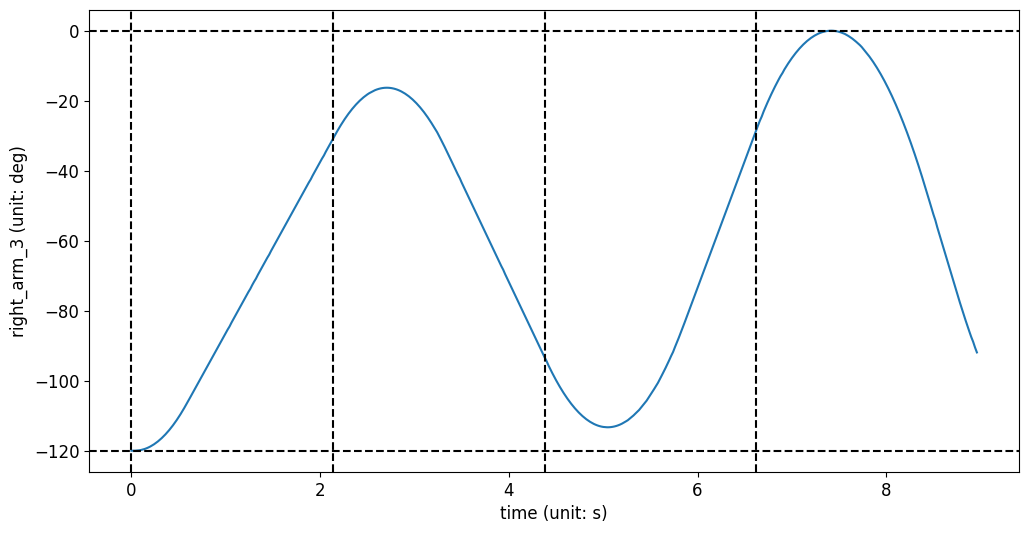

In [30]:
plt.figure(figsize=(12, 6), facecolor='white', dpi=100)
plt.rcParams.update({'font.size': 12})

tp = np.vstack(recorder.target_position)
plt.plot(np.arange(0, tp.shape[0]) * 0.02, np.rad2deg(tp[:, model.right_arm_idx[3]]))
plt.axhline(y=0, color='k', linestyle='--')
plt.axhline(y=-120.0, color='k', linestyle='--')
for ts in recorder.timestamp:
    plt.axvline(x=ts * 0.02, color='k', linestyle='--')
plt.xlabel('time (unit: s)')
plt.ylabel('right_arm_3 (unit: deg)')

# Example 8: Handling Kinematics and Dynamics

In [31]:
robot_model_urdf = robot.get_robot_model()
print("\n".join(robot_model_urdf.splitlines()[:20]))
print("...")

<?xml version="1.0"?>
<robot name="RB_Y1_V1.0.1">
    <mobile type="differential" xyz="0.228 0 0" rpy="0 0 0" joints="right_wheel left_wheel"
            params="0.53 0.1"/> <!-- wheel_base, wheel_radius -->

    <link name="base">
        <inertial>
            <mass value="60.08042639"/>
            <origin rpy="0 0 0" xyz="-0.06157942 -0.00142271 0.13513861"/>
            <inertia ixx="1.37742174" ixy="0.02521789" ixz="0.18565467" iyy="2.99386515" iyz="-0.00641869"
                     izz="3.76085052"/>
        </inertial>

        <visual>
            <geometry>
                <mesh filename="./meshes/base.dae"/>
            </geometry>
        </visual>
    </link>

...


In [32]:
dyn_model = robot.get_dynamics()
dyn_state = dyn_model.make_state(["base", "link_torso_5", "ee_right", "ee_left"], model.robot_joint_names)
BASE_INDEX, LINK_TORSO_5_INDEX, EE_RIGHT_INDEX, EE_LEFT_INDEX = 0, 1, 2, 3

In [33]:
dyn_state.set_q([0] * model.robot_dof)

In [34]:
dyn_model.compute_forward_kinematics(dyn_state)

In [35]:
T_base2right = dyn_model.compute_transformation(dyn_state, BASE_INDEX, EE_RIGHT_INDEX)
print(T_base2right)

[[ 1.     0.     0.     0.   ]
 [ 0.     1.     0.    -0.22 ]
 [ 0.     0.     1.     0.683]
 [ 0.     0.     0.     1.   ]]


In [36]:
dyn_state.set_q(robot.get_state().position)
dyn_model.compute_forward_kinematics(dyn_state)
T_base2right = dyn_model.compute_transformation(dyn_state, BASE_INDEX, EE_RIGHT_INDEX)
print(T_base2right)

[[ 0.768  0.    -0.64   0.388]
 [ 0.045  0.997  0.055 -0.248]
 [ 0.639 -0.071  0.766  0.768]
 [ 0.     0.     0.     1.   ]]


In [37]:
J_base2right = dyn_model.compute_body_jacobian(dyn_state, BASE_INDEX, EE_RIGHT_INDEX)
print(J_base2right)

[[ 0.     0.     0.768  0.045  0.045  0.045  0.768  0.639 -0.176  0.768  0.641 -0.    -0.833  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.997  0.997  0.997  0.    -0.071  0.962 -0.     0.     1.     0.     1.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.    -0.64   0.055  0.055  0.055 -0.64   0.766 -0.211 -0.641  0.768 -0.     0.553  0.     1.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.    -0.181  0.127  0.095 -0.253 -0.158  0.208 -0.533  0.    -0.    -0.322 -0.    -0.155 -0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.    -0.469  0.028  0.01   0.028  0.025  0.387 -0.107  0.398  0.388 -0.    -0.129  0.    -0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.    -0.217 -0.61  -0.261 -0.293 -0.19  -0.138 -0.042 -0.    -0.    -0.196 -0.     0.    -0.     0.     0.     0.     0.     0.     0.

In [38]:
dyn_state.set_gravity([0, 0, 0, 0, 0, -9.81])
print(dyn_model.compute_gravity_term(dyn_state))

[  0.     -0.     -6.057 -41.904  91.357 -17.556  -2.114  -0.001 -11.411  -1.928  -0.87  -10.522   0.324  -1.531  -0.004 -10.576   1.727   0.987  -9.72   -0.345  -1.745   0.004   0.      0.   ]


In [39]:
mass_matrix = dyn_model.compute_mass_matrix(dyn_state)
print(mass_matrix)

[[ 0.008  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.008  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.    23.947  0.068 -0.045  0.027  8.071 -1.284  0.521 -1.221 -0.663  0.308  0.083  0.044 -0.001 -0.519 -1.006 -0.722 -0.299  0.118 -0.053 -0.001  0.001  0.   ]
 [ 0.     0.     0.068 23.986 14.769  7.606  0.027  0.055 -0.869  0.035  0.052  0.239 -0.012 -0.025  0.    -0.695 -0.029 -0.054  0.442  0.018 -0.017 -0.     0.     0.001]
 [ 0.     0.    -0.045 14.769 12.2    5.058 -0.026  0.002 -0.638 -0.013  0.02   0.027 -0.003 -0.02   0.    -0.572  0.015 -0.02   0.151  0.007 -0.026 -0.     0.     0.001]
 [ 0.     0.     0.027  7.606  5.058  3.397  0.027 -0.052  0.168  0.035  0.032  0.346 -0.011  0.063  0.     0.084 -0.029 -0.037  0.352  0.013  0.

# Example 9: Cartesian Command with Impedance Control

In [40]:
ex4_move_to([0] * 6, [0] * 7, [0] * 7)
ex4_move_to(np.deg2rad([0.0, 45.0, -90.0, 45.0, 0.0, 0.0]), np.deg2rad([0.0, -5.0, 0.0, -120.0, 0.0, 70.0, 0.0]),
            np.deg2rad([0.0, 5.0, 0.0, -120.0, 0.0, 70.0, 0.0]))

True

In [41]:
def ex9_command_builder(right_delta_pose):
    dyn_state.set_q(robot.get_state().position)
    dyn_model.compute_forward_kinematics(dyn_state)
    T_torso2right = dyn_model.compute_transformation(dyn_state, LINK_TORSO_5_INDEX, EE_RIGHT_INDEX)

    T_delta = np.eye(4)
    T_delta[0:3, 3] = right_delta_pose
    right_builder = (
        rby.CartesianCommandBuilder()
        .set_command_header(rby.CommandHeaderBuilder().set_control_hold_time(100))
        .set_minimum_time(1.5)
        .add_target("link_torso_5", "ee_right", T_torso2right @ T_delta, 1.0, 1.0, 1.0)
        .add_joint_position_target(model.robot_joint_names[model.right_arm_idx[2]], 0)
    )

    T_rel = np.eye(4)
    T_rel[1, 3] = 0.5
    left_builder = (
        rby.ImpedanceControlCommandBuilder()
        .set_command_header(rby.CommandHeaderBuilder().set_control_hold_time(100))
        .set_reference_link_name("ee_right")
        .set_link_name("ee_left")
        .set_transformation(T_rel)
        .set_translation_weight([2000, 2000, 2000])
        .set_rotation_weight([200, 200, 200])
    )

    return rby.RobotCommandBuilder().set_command(
        rby.ComponentBasedCommandBuilder()
        .set_body_command(
            rby.BodyComponentBasedCommandBuilder()
            .set_right_arm_command(right_builder)
            .set_left_arm_command(left_builder)
        )
    )

In [42]:
right_deltas = [
    [0, -0.05, 0],
    [0, 0.05, 0],
    [0, 0, 0.1],
    [0, 0, -0.1]
]

stream = robot.create_command_stream()
for delta in right_deltas:
    stream.send_command(ex9_command_builder(delta))
    time.sleep(2.0)
stream.cancel()
stream.wait()